<a href="https://colab.research.google.com/github/Long-1234kfgkl/CS114.K21/blob/master/round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import thư viện

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



load data từ link "http://cs.uit.edu.vn/data2.txt"
đặt 2 column đầu là Size and Time

In [0]:
dataset = pd.read_csv("http://cs.uit.edu.vn/data2.txt",sep=' ',delimiter=',')
dataset.columns=["Size","Time"]

in ra số cột và hàng của dataset

In [0]:
dataset.shape

(71114, 2)

In ra một số cặp data,label

In [0]:
dataset.head()

,Size,Time
0,1954367,0.152648
1,3734185,0.298548
2,5839301,0.460480
3,6343427,0.527977
4,1355574,0.098012


Bảng thống kê dataset ta đưa vào

In [0]:
dataset.describe()

,Size,Time
count,7.111400e+04,71114.000000
mean,4.998751e+06,0.406783
std,2.882636e+06,0.244041
min,2.550000e+02,0.000009
25%,2.496500e+06,0.192745
50%,5.010070e+06,0.403409
75%,7.481820e+06,0.616159
max,9.999882e+06,0.983776


In [0]:
Biểu diễn các điểm là mối liên hệ giữa 2 feature Size và Time (BIỂU ĐỒ)

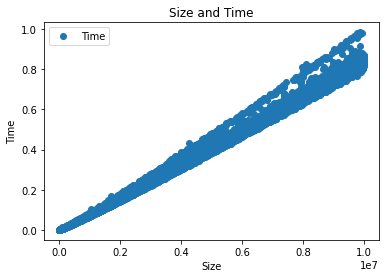

In [0]:
dataset.plot (x = 'Size', y = 'Time', style = 'o')
plt.title ( 'Size and Time')   
plt.xlabel ( 'Size')   
plt.ylabel ( 'Time') 
plt.show()

 đưa 2 feature Size và Time vào các biến X và y (đã được biến thàng dạng vector 1 chiều)

In [0]:
X = dataset['Size'].values.reshape(-1,1)
y = dataset['Time'].values.reshape(-1,1)

chia bộ dữ liệu thành 2 bộ, 80% cho training, 20% cho test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
Chọn model là LinearRegression
fit model

In [0]:
regressor = LinearRegression(fit_intercept=True)  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict dữ liệu

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
Bảng hai giá trị thực và giá trị đã dự đoán

In [0]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.259719,0.265724
1,0.205267,0.207193
2,0.187116,0.187720
3,0.121959,0.127391
4,0.180851,0.189075
...,...,...
14218,0.593030,0.613575
14219,0.606656,0.600485
14220,0.354746,0.361303
14221,0.070530,0.064454


Biểu đồ biễu diển 2 giá trị thực sự và dự đoán

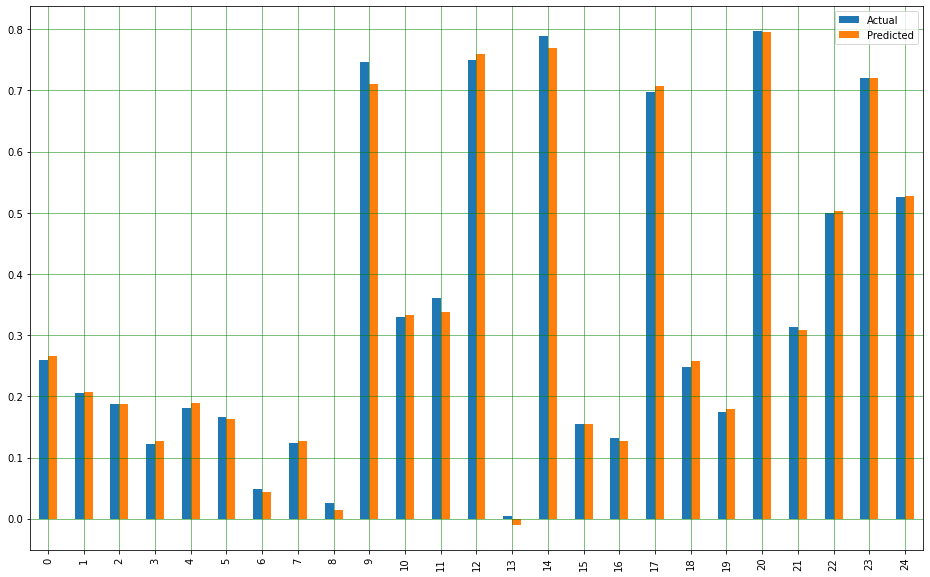

In [0]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In ra biểu đồ hàm ánh xạ trên biểu đồ Size and Time

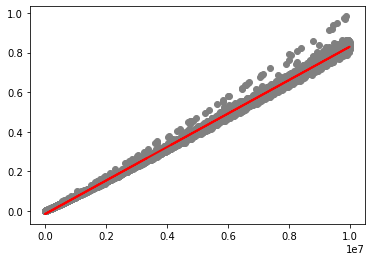

In [0]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In ra:
dòng 1 MSQ: lỗi bình phương góc
,dòng 2 : độ chính xác trong huấn luyện train
,dòng 3 : độ chính xác trong huấn luyện test




In [0]:
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

Mean Squared Error: 0.00014061212855587003
0.9975830192395551
0.9976304073751913
